<h1>Introduction</h1>
<p>In these lab notes we will introduce you to Naïve Bayes and your task is to implement a relatively simple spam filter.  We will use a small data set to train and test the model (available on Blackboard). </p> 

<b>Note:</b>  Use Jupyter Notebook or Google Colab (NOT Jupyter Lab).
    
<p>The messages within the datasets have already been classified as ham (not spam), or spam. </p> 

<p>The implementation of a Naïve Bayes Spam Filter is relatively straight forward using scikit-learn, however, this library hides the implementation details (and many solutions are available on the Internet).  Therefore, this task does not permit the use of the scikit-learn library or similar libraries that perform similar tasks.  We hope that this will help with your understanding of the implementation details.</p> 
<p>Bayes Theorem can give us the probability that a message is spam S for a given event E</p>

<h1>
$P\left(S\middle|\ E\right)=\frac{P\left(E\middle|\ S\right)P\left(S\right)}{P\left(E\middle|\ S\right)P\left(S\right)+P\left(E|\lnot S\right)P\left(\lnot S\right)}$
</h1>

<p>Where:</p>
<p>$P\left(S\middle|\ E\right)$, the probability that the message is spam given the event occurred.</p>
<p>$P\left(S\right)$, the prior probability that a message is spam.</p>
<p>$P\left(\lnot S\right)$, the prior probability that a message is not spam.  </p>

Note:  $P\left(S\right)$ and $P\left(\lnot S\right)$ are prior values, or prior beliefs.  This value could be calculated using the number of spam and number of ham classifications in the data set.  You could also use arbitrary values, for example; you could assume that of all email messages sent, 80% of them are spam and 20% of them are not spam.  The success of the filter depends on the prior values.

<p>$P\left(E\middle|\ S\right)$, the probability that event E occurs in a spam emails.</p>

<p>$P\left(E|\lnot S\right)$, the probability that event E occurs in non-spam emails.</p>

<h3>Additional Libraries</h3>
<p>As you progress through the exercises you may need additional libraries that are not installed, for example when visualising the data you may need to import WordCloud.  If you use [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb) the necessary libraries will be available, which will save you having to pip install.  </p>
<h3>The Implementation</h3>
<p>We have tried to keep the implementation quite simple and therefore not accounted for things like filtering small often used words, nor does the implementation calculate probabilities of a word in the frequency list not appearing in spam.  We have also filtered things like telephone numbers, which could be used to identify spam.   The final exercise allows you to make recommendations how the model could be improved.    </p>


<h3>1.  Read the dataset into a dataframe and explore</h3>
<p>Start by importing pandas and read the dataset into a DataFrame named df.  Output the first 20 rows of the dataframe to get a general feel of how the data is structured.</p>
<p>You may encounter the error: UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 135-136: invalid continuation byte.  You don't need to edit the datafile.  I was able to successfully read in the datafile by changing the encoding to latin-1.</p>
<p>[1 Mark]</p>

In [1]:
import pandas as pd
# Read in data from csv to dataframe
df = pd.read_csv("spam.csv", encoding="latin-1")
# Outputs the first 20 rows of dataframe
df.head(20)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


<h3>2. Clean the data</h3>
<p>We are only interested in words, clean the data so that all punctuations are removed.  You should be left with a dataset that only contains alpha characters (including spaces).  You should also ensure all the words are lowercase.  Store the cleaned data into a DataFrame named clean.</p>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Category</th>
      <th>Message</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>ham</td>
      <td>go until jurong point crazy available only in ...</td>
    </tr>
    <tr>
      <th>1</th>
      <td>ham</td>
      <td>ok lar joking wif u oni</td>
    </tr>
    <tr>
      <th>2</th>
      <td>spam</td>
      <td>free entry in  a wkly comp to win fa cup final...</td>
    </tr>
    <tr>
      <th>3</th>
      <td>ham</td>
      <td>u dun say so early hor u c already then say</td>
    </tr>
    <tr>
      <th>4</th>
      <td>ham</td>
      <td>nah i dont think he goes to usf he lives aroun...</td>
    </tr>
  </tbody>
</table>

[2 Marks]

In [2]:
import re # regex library that allows for easy filtering of strings

# Drops empty columns
clean = df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])
# Renames columns
clean = clean.rename(columns={"v1": "Category", "v2": "Message"})
#Loop through each message
for message in clean["Message"]:
    # Remove none alpha or space characters
    s = re.sub(r'[^a-zA-Z ]', '', message)
    # Convert to lower case
    s = s.lower()
    # Replaces old messages with new cleaned versions
    clean = clean.replace(to_replace=message, value=s)

clean.head(10)

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...
5,spam,freemsg hey there darling its been weeks now ...
6,ham,even my brother is not like to speak with me t...
7,ham,as per your request melle melle oru minnaminun...
8,spam,winner as a valued network customer you have b...
9,spam,had your mobile months or more u r entitled t...


<h3>3. Split the Data</h3>
<p>Split the data into two random samples, one for training the model and the other for testing the model.  Create DataFrames named train_data and test_data.  The train_data DataFrame should contain 75% of the data and the test_data DataFrame the remaining 25%.<p>  

<p>[1 Mark]</p>

In [3]:
train_data = clean.sample(frac=0.75, replace=False, random_state=5)
test_data = clean.drop(train_data.index)
print("Train Data\n")
print(train_data)
print("Test Data\n")
print(test_data)

Train Data

     Category                                            Message
2095      ham                      probably want to pick up more
5343      ham  no go no openings for that room til after than...
564       ham  fuck babe  i miss you already you know  cant y...
3849      ham  i to am looking forward to all the sex cuddlin...
3317      ham                    im freezing and craving ice fml
...       ...                                                ...
5512      ham                            just making dinner you 
3413      ham                               no pic please resend
5455      ham  wishing you a beautiful day each moment reveal...
3731      ham                       gud mrng dear hav a nice day
1027      ham          are you not around or just still asleep v

[4179 rows x 2 columns]
Test Data

     Category                                            Message
3         ham        u dun say so early hor u c already then say
18        ham  fine if thats the way u fee

<h3>4. Create a Word Frequency DataFrame</h3>
<p>Create a new DataFrame named word_freq that contains each word with the number of times it appears in a spam and a ham message.  You should use the train_data not the test_data.</p>
<p>Below is an example of what the DataFrame would look like, <i>note</i> that your values may differ depending on how the data was split.</p>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Word</th>
      <th>#Spam</th>
      <th>#Ham</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td>go</td>
      <td>27</td>
      <td>196</td>
    </tr>
    <tr>
      <td>1</td>
      <td>until</td>
      <td>4</td>
      <td>17</td>
    </tr>
    <tr>
      <td>2</td>
      <td>jurong</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>3</td>
      <td>point</td>
      <td>1</td>
      <td>9</td>
    </tr>
    <tr>
      <td>4</td>
      <td>crazy</td>
      <td>4</td>
      <td>8</td>
    </tr>
    <tr>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <td>7253</td>
      <td>salesman</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7254</td>
      <td>pity</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7255</td>
      <td>soany</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7256</td>
      <td>suggestions</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7257</td>
      <td>bitching</td>
      <td>1</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
<p>[2 Marks]</p>

<h4>Approach</h4>
<p>I will be counting the number of times a given word appear in each class, rather than the number of messages of a certain class type a word appears in. I will do this by appending all of the messages of each class to a seperate string, then checking how amny times a given word appears in the two different strings.</p>

In [4]:
# Getting unique list of all words
words = []
for message in train_data["Message"]:
    tmp = message.split()
    for t in tmp:
        if t not in words:
            words.append(t)

spamCount = [0] * len(words) #List to hold '#Spam' values for each word
hamCount = [0] * len(words) #List to hold '#Ham' values for each word

spamString = "" # string to store all spam messages
hamString = "" # string to store all ham messages

# Puts all messages from each class into seperate strings
for index, row in train_data.iterrows():
    if row['Category'] == 'spam':
        spamString += row['Message']
    else:
        hamString += row['Message']
        
# Checks how many times each word appears in each class
for i in range(len(words)):
    sCount = 0
    hCount = 0
    spamCount[i] = spamString.split().count(words[i])
    hamCount[i] = hamString.split().count(words[i])

#Puts the data into a dataframe
data = {"Word": words, "#Spam": spamCount, "#Ham": hamCount}
word_freq = pd.DataFrame(data)
word_freq.head(10)

,Word,#Spam,#Ham
0,probably,0,18
1,want,15,109
2,to,515,1160
3,pick,2,53
4,up,18,199
5,more,21,59
6,no,58,142
7,go,27,189
8,openings,0,1
9,for,141,356


<h3>5. Visualise the Data</h3>
<p>Let's use a Word Cloud library to visualise the most common words contained in spam messages.</p>

[Example of a Word Cloud Image](https://drive.google.com/open?id=1lVRGHtMB1AMJf-JSi7MmcHbZB_BvBhGC)

<p>[3 Marks]</p>



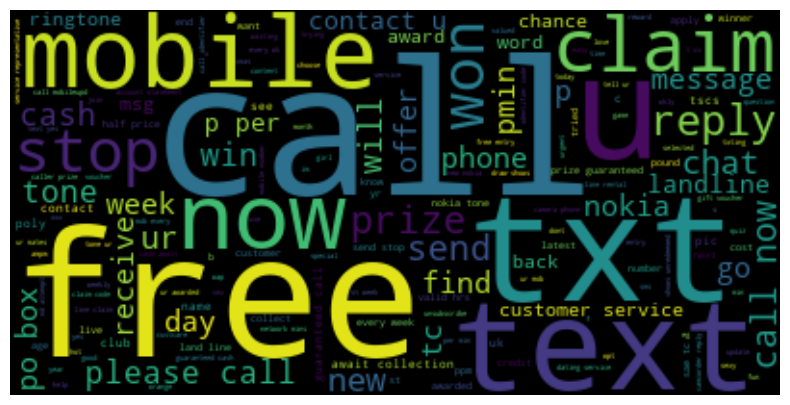

In [5]:
from wordcloud import WordCloud, STOPWORDS # library needed to create word clouds
import matplotlib.pyplot as plt

# Creates text to use in word cloud
text = ' '.join(spamString)
stopwords = set(STOPWORDS)
#Sets size of figure
fig = plt.figure(figsize=(10,5))
# Creates word cloud
wordCloud = WordCloud(stopwords=STOPWORDS).generate(spamString)

# Outputs word cloud
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<h4>Insights</h4>
<p>This shows me that some of the most frequently appearing words in spam messages are: free, call, mobile, text, u, prize etc. Therefore these words potentially are great indications of a message being spam. All these word also follow a theme of wanting to gain contact information or offering prizes, which is consistent with spam emails.</p>

<h3>6.  Calculate $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$</h3>
<p>Next create a new DataFrame named word_prob that gives the probability of each word being found in a spam and ham message.</p>
<p>To calculate the probability of a word being spam you divide the number of times the word was found in spam by the total number of spam messages, likewise to calculate the probability of each word being found in a ham message you divide the number of times the word was found in a ham message by the total number of ham messages.</p>
<p>If a word was not found in ham or spam it will cause problems later because the probability calculated will be zero. Therefore, use a pseudocount k and estimate the probability of seeing the word. This is known as smoothing and results in the following formula when k = 0.5, for example.</p>
<p>$P\left(E\middle| S\right)$ = (number of spams containing the word + k) / (total number of spam messages + 2 * k).</p>
<p>Likewise, for $P\left(E|\lnot S\right)$.</p>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Word</th>
      <th>P(E|S)</th>
      <th>P(E|¬S)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>go</td>
      <td>0.053322</td>
      <td>0.050055</td>
    </tr>
    <tr>
      <th>1</th>
      <td>until</td>
      <td>0.011364</td>
      <td>0.004275</td>
    </tr>
    <tr>
      <th>2</th>
      <td>jurong</td>
      <td>0.002622</td>
      <td>0.000138</td>
    </tr>
    <tr>
      <th>3</th>
      <td>point</td>
      <td>0.002622</td>
      <td>0.002344</td>
    </tr>
    <tr>
      <th>4</th>
      <td>crazy</td>
      <td>0.011364</td>
      <td>0.002344</td>
    </tr>
  </tbody>
</table>
</p>[2 Marks]</p>


<h4>Approach</h4>
<p>As I counted how many times any given word appeared in spam messages, I will calculate P(E|S) by doing (the number of times a word appears in spam + k )/ (the total number of words in all spam messages + 2*k). The same approach will be used for P(E|¬S). I will be using k=0.5 for the smoothing, which is needed ensure that we dont have any probabilities that are zero. Thisis important because as later probabilities we need to calculate take the product of these values, having a zero probability would give zero probabilities later on and mean that the model is very inaccurate</p>

In [6]:
k = 0.5 # value for smoothing

# Gets total number of words in spam and ham messages respectively
spamWords =  word_freq['#Spam'].sum()
hamWords = word_freq['#Ham'].sum()

# Creates lists to store the P(E|S) and P(E|¬S) values respectively
spamProb = [0] * len(word_freq['Word'])
hamProb = [0] * len(word_freq['Word'])

# Loop calculates P(E|S) and P(E|¬S) values and adds them to correct list
count = 0
for ind in word_freq.index:
    sFreq =  word_freq['#Spam'][ind]
    hFreq = word_freq['#Ham'][ind]
    spamProb[count] = (sFreq + k)/(spamWords + (2*k))
    hamProb[count] = (hFreq + k)/(hamWords + (2*k))
    count += 1

# Puts P(E|S) and P(E|¬S) values into df
data = {"Word" : word_freq['Word'], "P(E|S)" : spamProb, "P(E|¬S)" : hamProb}
word_prob = pd.DataFrame(data)
word_prob.head(10)

,Word,P(E|S),P(E|¬S)
0,probably,0.000044,0.000432
1,want,0.001376,0.002559
2,to,0.045761,0.027121
3,pick,0.000222,0.001250
4,up,0.001642,0.004662
5,more,0.001909,0.001391
6,no,0.005193,0.003330
7,go,0.002441,0.004429
8,openings,0.000044,0.000035
9,for,0.012561,0.008332


<h3>7. Checking the 'spamliness' of a single word</h3>
<p>Now that we have trained the model, we will test the model.  Before we use the test_data, first let’s check how the model calculates the spamliness of a single word.  This is where we use the Bayes Theorem formula.  We have already calculated $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$, so we can just extract these values from the word_prob DataFrame.</p>
<p>We need to decide on the prior values $P\left(S\right)$ and $P\left(\lnot S\right)$, this is where you can experiment and tweak the model, in this example the prior value for spam was set to $0.4$ and the prior value for not spam or ham was set to $0.6$.</p>
<h3>
$P\left(S\middle|\ E\right)=\frac{P\left(E\middle|\ S\right)P\left(S\right)}{P\left(E\middle|\ S\right)P\left(S\right)+P\left(E|\lnot S\right)P\left(\lnot S\right)}$
</h3>
<pre>
Output
Word = ['free']
P(E|S) = [0.29108392]
P(E|¬S) = [0.01365141]
P(S|E) = [0.93427577]
P(¬S|E) = [0.06572423]
</pre>

<p>[2 Marks]</p>

<h4>Approach</h4>
<p>I will use prior values of P(S) = 0.55 and P(¬S) = 0.45, I checked the probability of spam within the training data and found it to be 0.136, which I didn't think was a good value for the model as I suspect much more than 13% of emails are typically spam. In my own experience and with some research I have found that, generally more emails are spam than not spam. However, I want to choose values in such a way that the model doesn't asume almost every message is spam. That is why I have chosen the values I have.</p>

In [7]:
# Prior values
priorSpam = 0.55
priorHam = 0.45
# List to store P(S|E) values
spamliness = [0] * len(word_prob)
# Count and loop to populate above list
count = 0
for ind in word_prob.index:
    spamP = word_prob['P(E|S)'][ind]
    hamP = word_prob['P(E|¬S)'][ind]
    spamliness[count] = (spamP*priorSpam)/((spamP*priorSpam)+(hamP*priorHam))
    count += 1

# Adding data to df
word_prob['P(S|E)'] = spamliness
word_prob['P(¬S|E)'] = 1 - word_prob['P(S|E)']
word_prob.head(10)

,Word,P(E|S),P(E|¬S),P(S|E),P(¬S|E)
0,probably,0.000044,0.000432,0.111484,0.888516
1,want,0.001376,0.002559,0.396557,0.603443
2,to,0.045761,0.027121,0.673439,0.326561
3,pick,0.000222,0.001250,0.178266,0.821734
4,up,0.001642,0.004662,0.300947,0.699053
5,more,0.001909,0.001391,0.626523,0.373477
6,no,0.005193,0.003330,0.655868,0.344132
7,go,0.002441,0.004429,0.402526,0.597474
8,openings,0.000044,0.000035,0.607458,0.392542
9,for,0.012561,0.008332,0.648218,0.351782


<h3>8. Checking the 'spamliness' of several words</h3>
<p>To check the spamliness of several words contained in a message we multiply the probabilities.  The model assumes the words appear as independent events hence the naïve Bayes.  In reality of course, words are not independent events, but the model still performs well.  So we use the assumption that the words appear independently, and hence we multiply probabilities, so
$P(S\,|\, x_1,\dots,x_n)\approx \frac{P(S)\underset{i=1}{\overset{n}{\prod}}P(x_i | S)}{P(S)\underset{i=1}{\overset{n}{\prod}}P(x_i | S)+P(\neg S)\underset{i=1}{\overset{n}{\prod}}P(x_i | \neg S)}$

Calculate the probability for each word in a message being spam, you might want to store the calculations in a list named prob_spam.  Likewise create a list for each word not being spam.
Then multiply the probabilities and compare the results.  If the result of multiplying the probabilities for spam is greater than the result of multiplying the probabilities for not spam, then you assume the message as spam.
</p>
<p>If you have a word in your message that is not in the word_prob DataFrame then you can't get the probability.  Skip any words in the message that are not in the word_prob DataFrame.</p>
<p>[2 Marks]</p>

<h4>Approach</h4>
<p>I am going to calculate the 'spamliness' of some of the spam messages in my train_data df, as well as some of the ham messages. Checking each of theses messages will require checking the 'spamliness' of several words</p>

In [8]:
import numpy # will allow for easy multiplication of list elememts

# select first 3 spam and ham messages
spamMsgs = train_data[train_data['Category'] == 'spam'][:3]
hamMsgs = train_data[train_data['Category'] == 'ham'][:3]


# iterate through spam messages and calculate probability of each message being spam or ham
for message in spamMsgs['Message']:
    spamNums = []  # list to store P(E|S) for each word in message
    hamNums = []  # list to store P(E|¬S) for each word in message
    for word in message.split():
        # get word probabilities for current word
        tmp = word_prob[word_prob['Word'] == word]
        # check if word exists in word_prob dataframe
        if not tmp.empty:
            # add P(E|S) and P(E|¬S) to relevant list
            spamNums.append(tmp.iloc[0]['P(E|S)'])
            hamNums.append(tmp.iloc[0]['P(E|¬S)'])
        else:
            continue #Ignore words which are not in word_prob df
    probSpam = priorSpam * numpy.prod(spamNums)
    probHam = priorHam * numpy.prod(hamNums)
    # calculate final probabilities
    probS = probSpam / (probSpam + probHam)
    probH = probHam / (probSpam + probHam)
    print(message + ", Spam prob: " + str(probS) + ", Ham prob: " + str(probH) + "\n")
    
# iterate through ham messages and calculate probability of each message being spam or ham
for message in hamMsgs['Message']:
    spamNums = []  # list to store P(E|S) for each word in message
    hamNums = []  # list to store P(E|¬S) for each word in message
    for word in message.split():
        # get word probabilities for current word
        tmp = word_prob[word_prob['Word'] == word]
        # check if word exists in word_prob dataframe
        if not tmp.empty:
            # add P(E|S) and P(E|¬S) to relevant list
            spamNums.append(tmp.iloc[0]['P(E|S)'])
            hamNums.append(tmp.iloc[0]['P(E|¬S)'])
        else:
            continue #Ignore words which are not in word_prob df
    probSpam = priorSpam * numpy.prod(spamNums)
    probHam = priorHam * numpy.prod(hamNums)
    # calculate final probabilities
    probS = probSpam / (probSpam + probHam)
    probH = probHam / (probSpam + probHam)
    print(message + ", Spam prob: " + str(probS) + ", Ham prob: " + str(probH) + "\n")

bloomberg message center  why wait apply for your future httpcareers bloombergcom, Spam prob: 0.9999997418339392, Ham prob: 2.581660607265792e-07

what do u want for xmas how about  free text messages  a new video phone with half price line rental call free now on   to find out more, Spam prob: 0.9999999999986088, Ham prob: 1.3911838728502302e-12

dear uve been invited to xchat this is our final attempt to contact u txt chat to , Spam prob: 0.9999999999971488, Ham prob: 2.851065101924101e-12

probably want to pick up more, Spam prob: 0.009673202529604618, Ham prob: 0.9903267974703954

no go no openings for that room til after thanksgiving without an upcharge, Spam prob: 0.0004923169246741722, Ham prob: 0.9995076830753259

fuck babe  i miss you already you know  cant you let me send you some money towards your net  i need you  i want you  i crave you , Spam prob: 1.593356222575753e-16, Ham prob: 0.9999999999999998



<h4>Results</h4>
<p>Above I tested 3 spam and 3 ham messages from the training data and the results you can see above show the model is very accurate on this data, being over 95% sure of the correct answer for each. However, this is to be expected as it is the data the model was created from.</p>

<h3>9. Avoiding floating point underflow</h3>
<p>Our aim is to compare two probabilities $P(S|x_1,\dots,x_n)$ with $P(\neg S|x_1,\dots,x_n),$ according to our model introduced in Section 8, both probabilities share a common denominator which does not affect comparison. Hence we will calculate numerators only, which are proportional to $P(S|x_1,\dots,x_n)$ and $P(\neg S|x_1,\dots,x_n).$
</p>

<p>Multiplying a set of small probabilities could result in a floating-point error.  This is where the product becomes too small to be represented correctly.  To avoid this we can take the logarithm of the probabilities and add them.  

To avoid multiplication of small numbers, we use the following property of $\log(x):$</p>
$$
\log(a\cdot b)=\log(a)+\log(b)
$$
<p>i.e. the log of the product is equal to the sum of logs (so instead of multiplying small numbers we will add them):</p>
$$
P(S|x_1,x_2,\dots,x_n)\propto P(S)\cdot P(x_1|S)\cdot \dots \cdot P(x_n|S)$$
<p>becomes</p>
$$\log(P(S|x_1,x_2,\dots,x_n))\propto \log\left(P(S)\cdot P(x_1|S)\cdot \dots  P(x_n|S)\right)=$$ $$
\log(P(S))+\log(P(x_1|S))+\dots+\log(P(x_n|S))
$$
<p>So, to check spam or ham we just compare:</p>
$$
\log(P(S))+\log(P(x_1|S))+\dots+\log(P(x_n|S))
$$
<p>and </p>
$$
\log(P(\neg S))+\log(P(x_1|\neg S))+\dots+\log(P(x_n|\neg S))
$$


Change the equation so that logs are used.
</p>
<p>[1 Mark]</p>

<h4>Approach</h4>
<p>I will check the same messages as above in part 8, converting the calculation to use logs.</p>

In [9]:
import math # allows use of log function

# iterate through spam messages and calculate probability of each message being spam or ham
for message in spamMsgs['Message']:
    spamNums = []  # list to store P(E|S) for each word in message
    hamNums = []  # list to store P(E|¬S) for each word in message
    for word in message.split():
        # get word probabilities for current word
        tmp = word_prob[word_prob['Word'] == word]
        # check if word exists in word_prob dataframe
        if not tmp.empty:
            # add P(E|S) and P(E|¬S) to relevant list
            spamNums.append(tmp.iloc[0]['P(E|S)'])
            hamNums.append(tmp.iloc[0]['P(E|¬S)'])
        else:
            continue #Ignore words which are not in word_prob df
    # Calculates log values of word probabilities
    spamSum = 0
    for num in spamNums:
        spamSum += math.log(num)
    hamSum = 0
    for num1 in hamNums:
        hamSum += math.log(num1)
    # Calculates final log values
    probSpam = math.log(priorSpam) + spamSum
    probHam = math.log(priorHam) + hamSum
    print(message + ", Spam prob: " + str(probSpam) + ", Ham prob: " + str(probHam) + "\n")

    # iterate through spam messages and calculate probability of each message being spam or ham
for message in hamMsgs['Message']:
    spamNums = []  # list to store P(E|S) for each word in message
    hamNums = []  # list to store P(E|¬S) for each word in message
    for word in message.split():
        # get word probabilities for current word
        tmp = word_prob[word_prob['Word'] == word]
        # check if word exists in word_prob dataframe
        if not tmp.empty:
            # add P(E|S) and P(E|¬S) to relevant list
            spamNums.append(tmp.iloc[0]['P(E|S)'])
            hamNums.append(tmp.iloc[0]['P(E|¬S)'])
        else:
            continue #Ignore words which are not in word_prob df
    # Calculates log values of word probabilities
    spamSum = 0
    for num in spamNums:
        spamSum += math.log(num)
    hamSum = 0
    for num1 in hamNums:
        hamSum += math.log(num1)
    # Calculates final log values
    probSpam = math.log(priorSpam) + spamSum
    probHam = math.log(priorHam) + hamSum
    print(message + ", Spam prob: " + str(probSpam) + ", Ham prob: " + str(probHam) + "\n")

bloomberg message center  why wait apply for your future httpcareers bloombergcom, Spam prob: -80.39978019142401, Ham prob: -95.56944274610704

what do u want for xmas how about  free text messages  a new video phone with half price line rental call free now on   to find out more, Spam prob: -158.62226707814298, Ham prob: -185.9231331023378

dear uve been invited to xchat this is our final attempt to contact u txt chat to , Spam prob: -95.66991134146795, Ham prob: -122.25323981295561

probably want to pick up more, Spam prob: -41.37962757203937, Ham prob: -36.75095202152817

no go no openings for that room til after thanksgiving without an upcharge, Spam prob: -102.24840377729623, Ham prob: -94.6325083224392

fuck babe  i miss you already you know  cant you let me send you some money towards your net  i need you  i want you  i crave you , Spam prob: -190.16716095638643, Ham prob: -153.7916420918471



<h4>Results</h4>
<p>The above results show that the logs increase the magnitude of each probability greatly, avoiding underflow errors while still maintaining the correct prediction</p>

<h3>10. Testing the Model</h3>
<p>Now that we have tested the model using simple messages.  Let’s test the model using the messages from the test_set.  You should implement counters that displays how your model has performed and calculate the accuracy of the model.</p>
<pre>
match_spam 173
match_ham 843
thought_ham_is_spam 3
thought_spam_is_ham 357
Accuracy: 0.7383720930232558
</pre>
<p>[3 Marks]</p>


<h4>Approach</h4>
<p>I am, of course, going to test the model using the log probability values, calculating them as I did in part 9. This is important to avoid underflow problems. I will also be using the test_data dataframe as it was not a part of the training so is appropriate to use.

In [10]:
## Creating word frequency DF ##

# Getting unique list of all words
words = []
for message in test_data["Message"]:
    tmp = message.split()
    for t in tmp:
        if t not in words:
            words.append(t)

spamCount = [0] * len(words) #List to hold '#Spam' values for each word
hamCount = [0] * len(words) #List to hold '#Ham' values for each word

spamString = ""
hamString = ""

# Puts all messages from each class into seperatre strings
for index, row in test_data.iterrows():
    if row['Category'] == 'spam':
        spamString += row['Message']
    else:
        hamString += row['Message']
        
# Checks how many times each word appears in each 
for i in range(len(words)):
    sCount = 0
    hCount = 0
    spamCount[i] = spamString.count(words[i])
    hamCount[i] = hamString.count(words[i])

#Puts the data into a dataframe
data = {"Word": words, "#Spam": spamCount, "#Ham": hamCount}
word_freq = pd.DataFrame(data)

## Calculating P(E|S) and P(E|¬S) ##

k = 0.5
spamWords =  word_freq['#Spam'].sum()
hamWords = word_freq['#Ham'].sum()

spamProb = [0] * len(word_freq['Word'])
hamProb = [0] * len(word_freq['Word'])

count = 0
for ind in word_freq.index:
    sFreq =  word_freq['#Spam'][ind]
    hFreq = word_freq['#Ham'][ind]
    spamProb[count] = (sFreq + k)/(spamWords + (2*k))
    hamProb[count] = (hFreq + k)/(hamWords + (2*k))
    count += 1

data = {"Word" : word_freq['Word'], "P(E|S)" : spamProb, "P(E|¬S)" : hamProb}
word_prob = pd.DataFrame(data)

## Caclculation of spam probabilities for individual words ##

# Prior values
priorSpam = 0.55
priorHam = 0.45
# List to store P(S|E) values
spamliness = [0] * len(word_prob)
# Count and loop to populate above list
count = 0
for ind in word_prob.index:
    spamP = word_prob['P(E|S)'][ind]
    hamP = word_prob['P(E|¬S)'][ind]
    spamliness[count] = (spamP*priorSpam)/((spamP*priorSpam)+(hamP*priorHam))
    count += 1

# Adding data to df
word_prob['P(S|E)'] = spamliness
word_prob['P(¬S|E)'] = 1 - word_prob['P(S|E)']

## Deciding if message is spam or ham ##

# Getting accuracy stats
match_spam = 0
match_ham = 0
thought_spam_was_ham = 0
thought_ham_was_spam = 0

# iterate through messages and calculate probability of each message being spam or ham
for message in test_data['Message']:
    spamNums = []  # list to store P(E|S) for each word in message
    hamNums = []  # list to store P(E|¬S) for each word in message
    for word in message.split():
        # get word probabilities for current word
        tmp = word_prob[word_prob['Word'] == word]
        # check if word exists in word_prob dataframe
        if not tmp.empty:
            # add P(E|S) and P(E|¬S) to relevant list
            spamNums.append(tmp.iloc[0]['P(E|S)'])
            hamNums.append(tmp.iloc[0]['P(E|¬S)'])
        else:
            continue #Ignore words which are not in word_prob df
    # Calculates log values of word probabilities
    spamSum = 0
    for num in spamNums:
        spamSum += math.log(num)
    hamSum = 0
    for num1 in hamNums:
        hamSum += math.log(num1)
    # Calculates final log values
    probSpam = math.log(priorSpam) + spamSum
    probHam = math.log(priorHam) + hamSum
    # Model thinks spam
    if probSpam > probHam:
        tmp = test_data[test_data['Message'] == message]
        # Is spam
        if tmp.iloc[0]['Category'] == 'spam':
            match_spam += 1
        # Isn't spam
        else:
            thought_ham_was_spam += 1
    # Model thinks Ham
    else:
        tmp = test_data[test_data['Message'] == message]
        # Is ham
        if tmp.iloc[0]['Category'] == 'ham':
            match_ham += 1
        # Isn't ham
        else:
            thought_spam_was_ham += 1
            
accuracy = (match_spam+match_ham)/(match_spam+match_ham+thought_spam_was_ham+thought_ham_was_spam)
print("Matched Spam: " + str(match_spam))
print("Matched Ham: " + str(match_ham))
print("Thought ham was spam: " + str(thought_ham_was_spam)) 
print("Thought spam was ham: " + str(thought_spam_was_ham))
print("Accuracy: " + str(accuracy))

Matched Spam: 178
Matched Ham: 1112
Thought ham was spam: 103
Thought spam was ham: 0
Accuracy: 0.9260588657573582


<h4>Reviewing model</h4>

<p>In the model I'm using the log values to ensure I don't encounter any issues with getting probabilities of 0, which I don't. As for the performance of the model it is clear from the fact the model doesn't identify any spam as ham, but does identify 103 ham messages as spam that the model is overstating the amount of spam there is. This could be due to my prior for spam being a little too high. However, the overall accuracy of the model is 92.6% so the model works well.<p> 

<h3>11. Improvements</h3>
<p>Give some suggestions or recommendations on how the accuracy of the model could be improved.</p>
<p>[1 Mark]</p>

<p>One way accuracy of the model could be improved is by filtering out words that are high frequency in both spam messages and ham messages or low frequency in both spam and ham messages. This would improve accuracy becasue these words provide little to no indication as to wheter a given message is spam or not.</p>

<p>Another way to improve the accuracy of the model to train the model on a larger dataset, so popular words in spam emails would become more clear, as would unpopular words for spam emails.</p>

<p>Another way the accuracy of the model could be improved is to not remove phone numbers from the data as they can potentially help indicate if any given message is spam or not</p>

<h3></h3>